## В этом скрипте приведен краткий способ чтения изображений и разметки

### Начнем с чтения csv файла.
Пусть входом у нас является csv файл, а выходом -- словарь, где ключ соответствует имени файла, а значение -- кортежу координат точки схода.

*ВНИМАНИЕ*: Важно, чтобы имя файла в папке и в csv совпадало -- это наша конвенция. Поправил это в папках Семенкова и Рога. 

In [1]:
import csv
import os

answers = dict()

path_to_data = r'..\dataset\semenkov'

with open(os.path.join(path_to_data, 'vanish_points.csv'), 'r') as csv_file:
    reader = csv.reader(csv_file)
    next(reader, None) # helps skip header
    for row in reader:
        name, x, y, _ = row[0].split(';')
        answers[name] = tuple((int(x), int(y)))

import pprint
pprint.pprint(answers)

{'10_SI.png': (203, 201),
 '11_SI.png': (293, 222),
 '12_SI.png': (277, 208),
 '13_SI.png': (79, 209),
 '14_SI.png': (185, 226),
 '15_SI.png': (138, 203),
 '16_SI.png': (305, 218),
 '17_SI.png': (178, 222),
 '18_SI.png': (190, 215),
 '19_SI.png': (256, 220),
 '1_SI.png': (228, 216),
 '20_SI.png': (214, 208),
 '21_SI.png': (294, 192),
 '22_SI.png': (188, 217),
 '23_SI.png': (125, 196),
 '24_SI.png': (325, 208),
 '25_SI.png': (305, 219),
 '26_SI.png': (309, 204),
 '27_SI.png': (203, 213),
 '28_SI.png': (130, 186),
 '29_SI.png': (208, 205),
 '2_SI.png': (195, 222),
 '30_SI.png': (304, 206),
 '31_SI.png': (301, 199),
 '32_SI.png': (350, 187),
 '33_SI.png': (148, 219),
 '34_SI.png': (119, 223),
 '35_SI.png': (103, 211),
 '36_SI.png': (196, 213),
 '37_SI.png': (136, 209),
 '38_SI.png': (200, 211),
 '39_SI.png': (315, 214),
 '3_SI.png': (289, 194),
 '40_SI.png': (193, 199),
 '41_SI.png': (336, 204),
 '42_SI.png': (254, 196),
 '43_SI.png': (266, 195),
 '44_SI.png': (316, 198),
 '45_SI.png': (2

### Первичная проверка данных

Теперь проверим насколько хорошо мы разметили данные. Поскольку сложно рисовать точку схода, если её нет на кадре, то будем случайно выбирать изображение для которого точка схода находится в области изображения. Поскольку картинки разного размера в одном датасете, то размер кружка подбирается пропорционально размеру.

Filename: 24_SI.png, vp coordinates (325, 208)


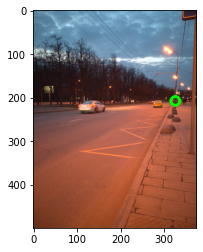

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import cv2

import random

while True:
    key = random.choice(list(answers.keys()))
    img = cv2.imread(os.path.join(path_to_data, key))
    if img.shape[0] > answers[key][0] > 0 and img.shape[1] > answers[key][1] > 0:
        break

print(f'Filename: {key}, vp coordinates {answers[key]}')

circle_size = int(img.shape[0]/50)
circle_thickness = int(img.shape[0]/100)
cv2.circle(img, answers[key], circle_size, (0,255,0), thickness=circle_thickness, lineType=8, shift=0)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()